In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, jaccard_score, f1_score
import seaborn as sns

In [2]:
# Download data
# !wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

- LogisticRegression
- confusion_matrix

In [3]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.shape

(200, 28)

In [5]:
df['churn'].unique()

array([1., 0.])

In [6]:
X = df.drop(['churn'], axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                    random_state=42)

In [7]:
# from sklearn.model_selection import GridSearchCV

# # Model (örnek olarak Support Vector Machine - SVM kullanıldı).

# # Ayarlanacak hiperparametreler ve değer aralıkları belirlenir.
# param_log = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

# # Grid Search ile en iyi hiperparametreleri bulunur.
# log_search = GridSearchCV(log_model, param_log, cv=5)
# log_search.fit(X, y)

# # En iyi hiperparametreleri ve sonuçları görüntüleyin.
# print("En İyi Hiperparametreler:", log_search.best_params_)
# print("En İyi Doğruluk (Accuracy):", log_search.best_score_)

In [8]:
# Logistic Regression
log_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
log_model2 = LogisticRegression(C=0.01, solver='lbfgs').fit(X,y)
# Küçük c değeri overfitting'i azaltır ve küçük c değerlerinde solver parametresi 'liblinear' olmalıdır.
yhat = log_model.predict(X_test)
yhat2 = log_model2.predict(X_test)

c:\Users\Seher\Desktop\AdaLovelaceAkademi\AdaLovelaceAkademi\data-science-main\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
yhat

array([1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0.])

In [10]:
# probabilities of predictions
yhat_prob = log_model.predict_proba(X_test)
yhat_prob[0:5]

array([[0.44823159, 0.55176841],
       [0.23726566, 0.76273434],
       [0.77529531, 0.22470469],
       [0.87896021, 0.12103979],
       [0.84733727, 0.15266273]])

In [11]:
yhat_prob2 = log_model2.predict_proba(X_test)
yhat_prob2[0:5]

array([[0.37889096, 0.62110904],
       [0.30718765, 0.69281235],
       [0.80096535, 0.19903465],
       [0.91852473, 0.08147527],
       [0.81297718, 0.18702282]])

In [12]:
# Evaluation
accuracy = accuracy_score(y_test, yhat)
print("Doğruluk:", accuracy)

accuracy2 = accuracy_score(y_test, yhat2)
print("Doğruluk:", accuracy2)

Doğruluk: 0.7
Doğruluk: 0.8


In [13]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        45
         1.0       0.40      0.40      0.40        15

    accuracy                           0.70        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.70      0.70      0.70        60



In [14]:
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        45
         1.0       0.64      0.47      0.54        15

    accuracy                           0.80        60
   macro avg       0.74      0.69      0.71        60
weighted avg       0.79      0.80      0.79        60



In [15]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(cnf_matrix)

[[36  9]
 [ 9  6]]


In [16]:
cnf_matrix2 = confusion_matrix(y_test, yhat2, labels=[0,1])
print(cnf_matrix2)

[[41  4]
 [ 8  7]]


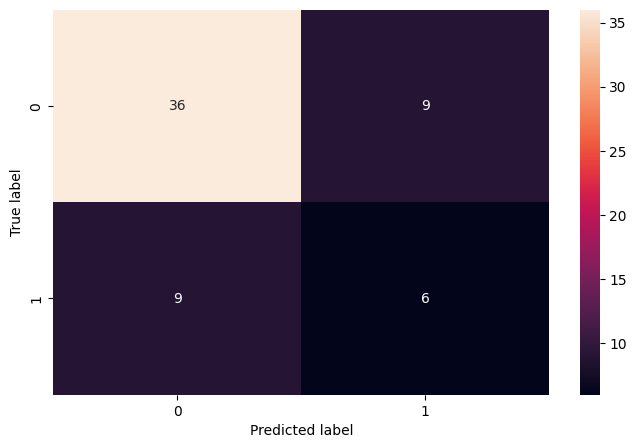

In [17]:
# Plot confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cnf_matrix, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
TP = cnf_matrix[1][1]
TN = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 6
True Negatives: 36
False Positives: 9
False Negatives: 9


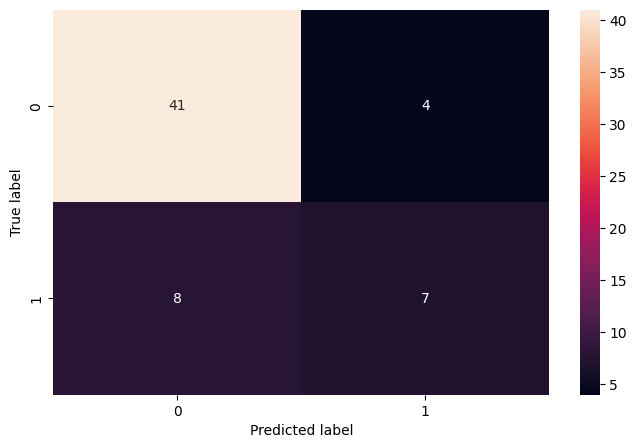

In [19]:
# Plot confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cnf_matrix2, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
TP2 = cnf_matrix2[1][1]
TN2 = cnf_matrix2[0][0]
FP2 = cnf_matrix2[0][1]
FN2 = cnf_matrix2[1][0]

print("True Positives:", TP2)
print("True Negatives:", TN2)
print("False Positives:", FP2)
print("False Negatives:", FN2)

True Positives: 7
True Negatives: 41
False Positives: 4
False Negatives: 8


### log_model Accuracy

In [21]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Doğruluk:", accuracy)

precision = TP / (TP + FP)
print("Hassasiyet:", precision)

recall = TP / (TP + FN)
print("Duyarlılık:", recall)

f1_score_result = 2 * precision * recall / (precision + recall)
print("F1 Skoru:", f1_score_result)

Doğruluk: 0.7
Hassasiyet: 0.4
Duyarlılık: 0.4
F1 Skoru: 0.4000000000000001


### log_model2 Accuracy

In [22]:
accuracy = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)
print("Doğruluk:", accuracy)

precision = TP2 / (TP2 + FP2)
print("Hassasiyet:", precision)

recall = TP2 / (TP2 + FN2)
print("Duyarlılık:", recall)

f1_score_result = 2 * precision * recall / (precision + recall)
print("F1 Skoru:", f1_score_result)

Doğruluk: 0.8
Hassasiyet: 0.6363636363636364
Duyarlılık: 0.4666666666666667
F1 Skoru: 0.5384615384615385


In [23]:
# Evaluation using log loss, jaccard index and f1 score for log_model
print("Log Loss:", log_loss(y_test, yhat_prob))
print("Jaccard:", jaccard_score(y_test, yhat, pos_label=0))
print("F1 Score:", f1_score(y_test, yhat))

Log Loss: 0.4912205782137223
Jaccard: 0.6666666666666666
F1 Score: 0.4000000000000001


In [24]:
# Evaluation using log loss, jaccard index and f1 score for log_model2
print("Log Loss:", log_loss(y_test, yhat_prob2))
print("Jaccard:", jaccard_score(y_test, yhat2, pos_label=0))
print("F1 Score:", f1_score(y_test, yhat2))

Log Loss: 0.41516132920537635
Jaccard: 0.7735849056603774
F1 Score: 0.5384615384615385
